# Summary

## Findings
* Most hosts respond within an hour
* Most hosts are neither verified or superhosts
* Bed type, requires license, and host has a profile pic are not a useful field
* There are a handful of features that are correlated with price
* A few features are highly correlated with each other
* The target variable is skewed and will need to be log transformed 

## To-Do
* Log transform target
* Remove correlated features
* Remove non useful features

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Findings</a></span></li><li><span><a href="#To-Do" data-toc-modified-id="To-Do-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>To-Do</a></span></li></ul></li><li><span><a href="#Histograms-and-Bar-Charts" data-toc-modified-id="Histograms-and-Bar-Charts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histograms and Bar Charts</a></span></li><li><span><a href="#Kernel-Density-Estimate-Plots" data-toc-modified-id="Kernel-Density-Estimate-Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kernel Density Estimate Plots</a></span><ul class="toc-item"><li><span><a href="#All-columns" data-toc-modified-id="All-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>All columns</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Overall-Correlations" data-toc-modified-id="Overall-Correlations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall Correlations</a></span></li><li><span><a href="#Top-10-Correlations-with-Target" data-toc-modified-id="Top-10-Correlations-with-Target-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Top 10 Correlations with Target</a></span></li><li><span><a href="#Absolute-Correlated-Features" data-toc-modified-id="Absolute-Correlated-Features-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Absolute Correlated Features</a></span></li></ul></li><li><span><a href="#Distribution-Analysis" data-toc-modified-id="Distribution-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distribution Analysis</a></span><ul class="toc-item"><li><span><a href="#Target-Distribution" data-toc-modified-id="Target-Distribution-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Target Distribution</a></span></li><li><span><a href="#Empirical-Cumulative-Distribution-Function-(ECDF)" data-toc-modified-id="Empirical-Cumulative-Distribution-Function-(ECDF)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Empirical Cumulative Distribution Function (ECDF)</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Background</a></span></li></ul></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Boxplots</a></span></li><li><span><a href="#Target-Distribution-by-Selected-Categories" data-toc-modified-id="Target-Distribution-by-Selected-Categories-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Target Distribution by Selected Categories</a></span></li></ul></li><li><span><a href="#Mapping" data-toc-modified-id="Mapping-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Mapping</a></span></li></ul></div>

In [1]:
# Import needed libraries
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.plotting import ecdf
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
# Set the style of plots
plt.style.use('fivethirtyeight')


# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('data/processed/listings_cleaned.pkl')

X = df.drop(columns='price',axis=1)
y = df.price
num_df = df.select_dtypes(np.number)

df.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,reviews_per_month,Topic,median_home_value,median_income,population,distance_Disneyland,distance_Universal,distance_Convention_Center,distance_LAX,distance_Downtown_LA,distance_Seaworld,distance_Santa_Monica_beach,distance_San_Diego,distance_Venice_beach,distance_Griffith_Park,distance_Hollywood,distance_Long_beach,distance_Ontario_airport,distance_Compton,distance_Rose_Bowl
0,within an hour,100.0,True,1.0,True,False,93550,34.485432,-118.125381,House,Private room,2,1.0,1.0,1.0,Real Bed,{},50.0,NaN,0.0,1,0.0,1,1125,29,45,75,350,33,93.0,f,False,flexible,1.91,6,278000,20222,75774,47.831340,27.240032,31.757775,40.730427,30.827716,129.380985,39.019592,134.346325,39.960522,27.162750,29.146583,49.875594,42.246084,40.869533,22.082232
1,within an hour,100.0,True,2.0,True,True,93550,34.556740,-118.063812,House,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",32.0,NaN,10.0,1,5.0,1,1125,1,19,48,48,22,92.0,f,True,flexible,4.89,5,278000,20222,75774,51.928789,33.245785,37.478527,46.656835,36.517031,132.558790,45.058054,137.440999,45.971478,33.060207,35.105072,55.010913,43.570516,46.291467,27.506948
2,within an hour,100.0,True,2.0,True,True,93550,34.560383,-118.097412,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Kitchen,""Free parking on premises"",""Smoking a...",24.0,NaN,0.0,1,8.0,1,1125,20,46,76,351,50,95.0,f,False,moderate,2.76,1,278000,20222,75774,52.516787,32.556593,37.161992,46.108002,36.228216,133.507963,44.231833,138.417538,45.259948,32.555840,34.510018,55.112044,44.965477,46.209716,27.409527
3,within a few hours,90.0,False,1.0,True,True,93550,34.557838,-118.084343,Apartment,Entire home/apt,4,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",95.0,$150.00,0.0,1,0.0,6,150,19,21,21,272,12,96.0,f,False,flexible,0.38,1,278000,20222,75774,52.203890,32.744202,37.198973,46.241453,36.253740,133.064145,44.479491,137.963696,45.460138,32.667396,34.659456,54.987096,44.357639,46.155240,27.354661
4,NaN,0.0,True,1.0,True,True,93550,34.576488,-118.082581,House,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",50.0,NaN,0.0,1,15.0,1,3,0,0,0,0,15,97.0,f,False,moderate,1.09,4,278000,20222,75774,53.450689,33.929663,38.460595,47.460506,37.519105,134.219215,45.620846,139.109282,46.637485,33.897307,35.868944,56.276564,45.302083,47.439612,28.638536


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20586 entries, 0 to 20585
Data columns (total 53 columns):
host_response_time             18331 non-null category
host_response_rate             20586 non-null float64
host_is_superhost              20586 non-null bool
host_listings_count            20577 non-null float32
host_has_profile_pic           20586 non-null bool
host_identity_verified         20586 non-null bool
zipcode                        20586 non-null int32
latitude                       20586 non-null float32
longitude                      20586 non-null float32
property_type                  20586 non-null category
room_type                      20586 non-null category
accommodates                   20586 non-null int64
bathrooms                      20521 non-null float32
bedrooms                       20563 non-null float32
beds                           20568 non-null float32
bed_type                       20586 non-null category
amenities                      20586

In [3]:
df.describe()

,host_response_rate,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,Topic,median_home_value,median_income,population,distance_Disneyland,distance_Universal,distance_Convention_Center,distance_LAX,distance_Downtown_LA,distance_Seaworld,distance_Santa_Monica_beach,distance_San_Diego,distance_Venice_beach,distance_Griffith_Park,distance_Hollywood,distance_Long_beach,distance_Ontario_airport,distance_Compton,distance_Rose_Bowl
count,20586.000000,20577.000000,20586.000000,20586.000000,20586.000000,20586.000000,20521.000000,20563.000000,20568.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,2.058600e+04,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20322.000000,20573.000000,20586.000000,2.058600e+04,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000,20586.000000
mean,85.074857,5.149390,90441.178568,34.054947,-118.338371,3.381861,1.316676,1.393717,1.873785,126.537696,54.944331,1.769066,13.798698,3.063927,3.137342e+05,13.609929,30.420966,48.888128,204.768143,26.373749,94.170212,1.804387,5.313174,1.415174e+06,37373.069708,37979.625474,30.099134,10.241485,9.760586,12.456986,9.954707,109.713057,12.782816,114.977886,12.244375,9.755591,8.981419,24.163481,42.591050,15.856611,14.948581
std,32.559825,20.624077,595.821935,0.100060,0.152132,2.207823,0.638998,0.739942,1.433790,87.480705,53.388692,1.405879,20.311887,8.056655,2.592288e+07,11.176143,21.650874,32.144979,133.992888,40.531134,8.145058,1.895708,2.557343,7.911257e+05,14538.899336,16659.171158,7.347821,7.278189,6.423050,6.969978,6.513948,7.753333,8.110052,7.776807,7.908187,7.093646,7.320096,7.024474,8.587014,5.597237,6.808010
min,0.000000,0.000000,90001.000000,33.339008,-118.911026,1.000000,0.000000,1.000000,1.000000,10.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.020000,1.000000,2.469000e+05,12304.000000,835.000000,7.050164,0.230342,0.089329,0.870992,0.073144,75.017054,0.071163,80.286803,0.007500,0.347119,0.008650,0.123885,6.699869,0.511863,0.171745
25%,93.000000,1.000000,90031.000000,34.011575,-118.426899,2.000000,1.000000,1.000000,1.000000,65.000000,15.000000,1.000000,0.000000,1.000000,3.100000e+01,1.000000,10.000000,19.000000,78.000000,3.000000,92.000000,0.400000,3.000000,8.116000e+05,24973.000000,27170.000000,26.709145,4.980420,5.211390,7.753324,5.404174,107.477647,8.015260,112.723785,7.337644,4.360288,3.692442,22.129949,38.722576,12.953150,9.969269
50%,100.000000,2.000000,90068.000000,34.066404,-118.347576,2.000000,1.000000,1.000000,1.000000,99.000000,45.000000,1.000000,10.000000,2.000000,1.125000e+03,13.000000,31.000000,54.000000,238.000000,11.000000,96.000000,1.090000,6.000000,1.228400e+06,35880.000000,34922.000000,30.665186,8.421649,8.851297,11.322589,9.024832,110.540840,11.724326,115.831051,11.459284,8.030834,7.059036,24.249652,43.230114,15.159313,13.339143
75%,100.000000,4.000000,90802.000000,34.103009,-118.264423,4.000000,1.500000,2.000000,2.000000,160.000000,80.000000,2.000000,20.000000,3.000000,1.125000e+03,25.000000,52.000000,80.000000,336.000000,32.000000,100.000000,2.630000,7.000000,1.880400e+06,50641.000000,49389.000000,33.548177,12.464996,12.288968,15.802345,13.000258,112.556028,15.095811,117.836943,15.051604,13.098596,11.216954,26.119915,48.099896,17.302708,20.208895
max,100.000000,821.000000,93552.000000,34.732700,-117.655472,16.000000,8.000000,8.000000,16.000000,499.000000,675.000000,16.000000,300.000000,365.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,605.000000,100.000000,21.059999,10.000000,5.820800e+06,94643.000000,108051.000000,74.309672,55.115703,51.2

# Histograms and Bar Charts

C:\Users\peril\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The following columns had too many unique values to plot:['host_listings_count', 'zipcode', 'latitude', 'longitude', 'property_type', 'amenities', 'security_deposit', 'review_scores_rating', 'reviews_per_month']


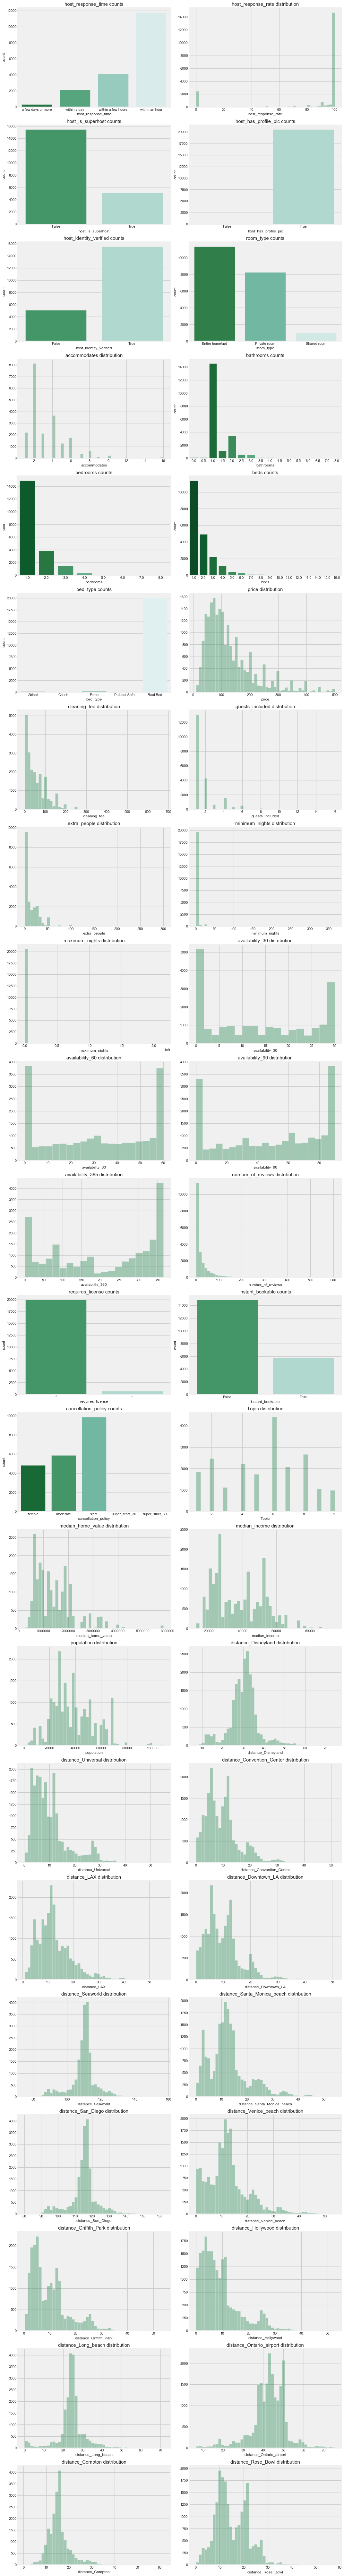

In [4]:
# Identify columns too large to plot
missed = []
for col in df.columns:
    if (df[col].dtypes == np.float or df[col].dtypes == np.int64 or df[col].nunique() < 20):
        pass
    else:
        missed.append(col)

# Plot charts
to_plot = df.drop(columns=missed, axis=1)
number_of_columns = 2
number_of_rows = to_plot.shape[1]-1/number_of_columns
plt.figure(figsize=(15, 5*number_of_rows))

for i, col in zip(range(0, to_plot.shape[1]), to_plot.columns):
    plt.subplot(number_of_rows, number_of_columns, i+1)

    if (to_plot[col].dtypes == np.float or to_plot[col].dtypes == np.int64):

        if (to_plot[col].nunique() == 2):
            sns.countplot(to_plot[col], palette="BuGn_r").set_title(
                f'{col} counts', fontsize=15)
        else:
            df2 = to_plot[col].dropna(axis=0)
            sns.distplot(df2, kde=False, color='seagreen').set_title(
                f'{col} distribution', fontsize=15)
    else:
        sns.countplot(to_plot[col], palette="BuGn_r").set_title(
            f'{col} counts', fontsize=15)

print(f'The following columns had too many unique values to plot:{missed}')
plt.tight_layout()

# Kernel Density Estimate Plots

## All columns

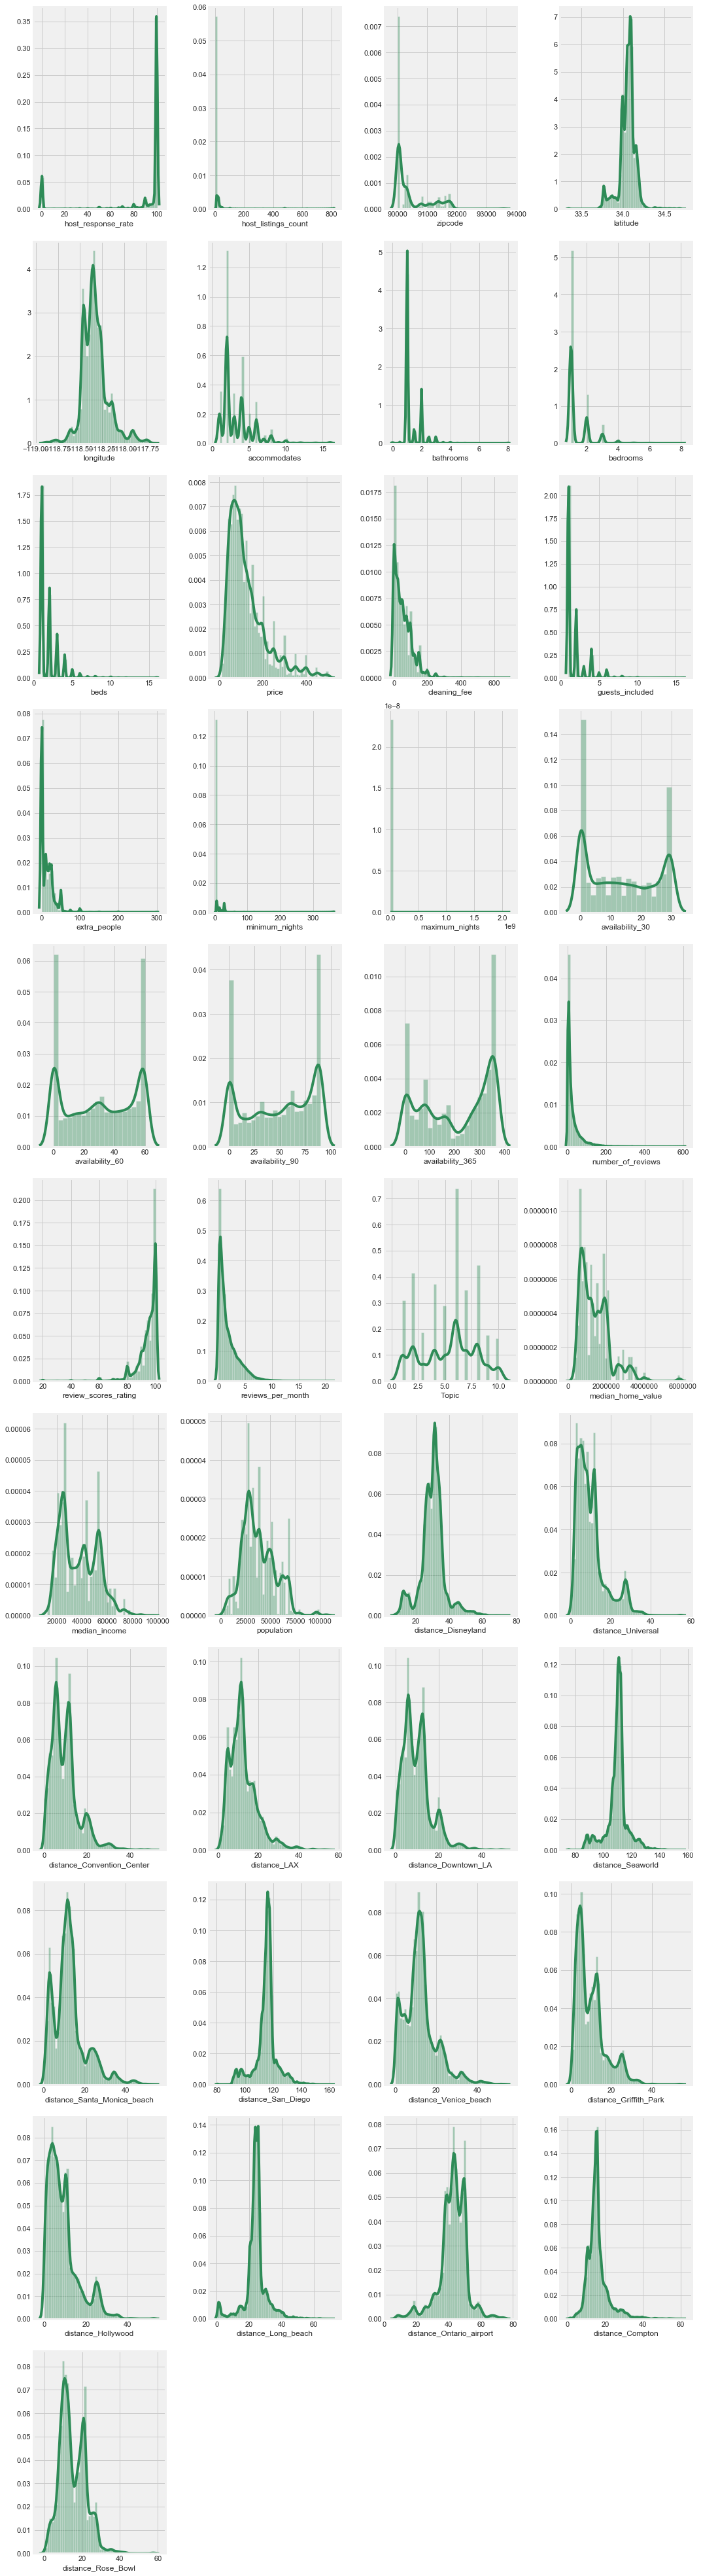

In [5]:
l = num_df.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(15,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(num_df[l[i]].dropna(),kde=True,color='seagreen') 
    plt.tight_layout()

# Correlations

## Overall Correlations

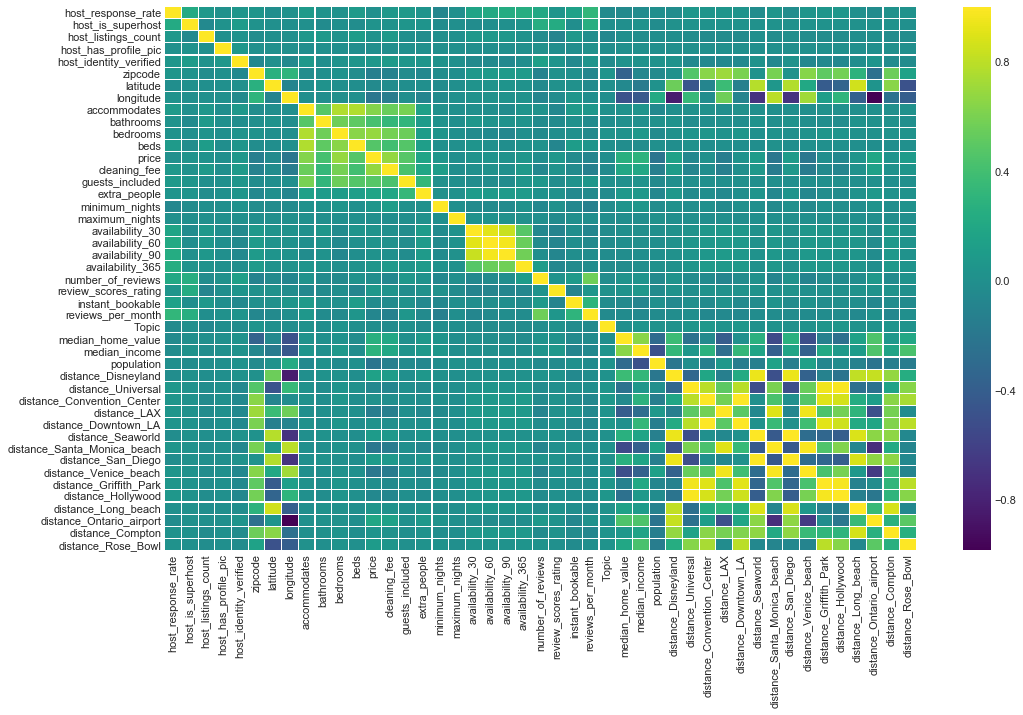

In [6]:
#Quality correlation matrix
cols = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cols, annot=False, cmap = 'viridis', linewidths=.1)

## Top 10 Correlations with Target

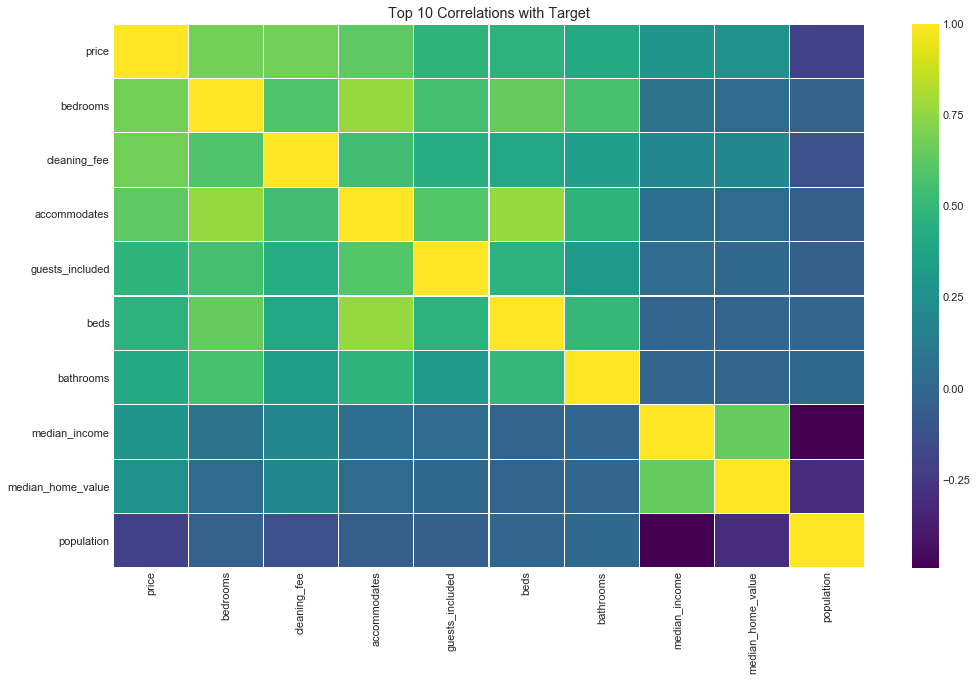

In [7]:
#Quality correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().abs().nlargest(k, 'price')['price'].index
cm = df[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=False, cmap = 'viridis', linewidths=.1)
plt.title("Top 10 Correlations with Target")
plt.savefig('top_10_correlations.png', bbox_inches='tight', pad_inches=.2)

Text(0.5, 1.0, 'Correlated with Target')

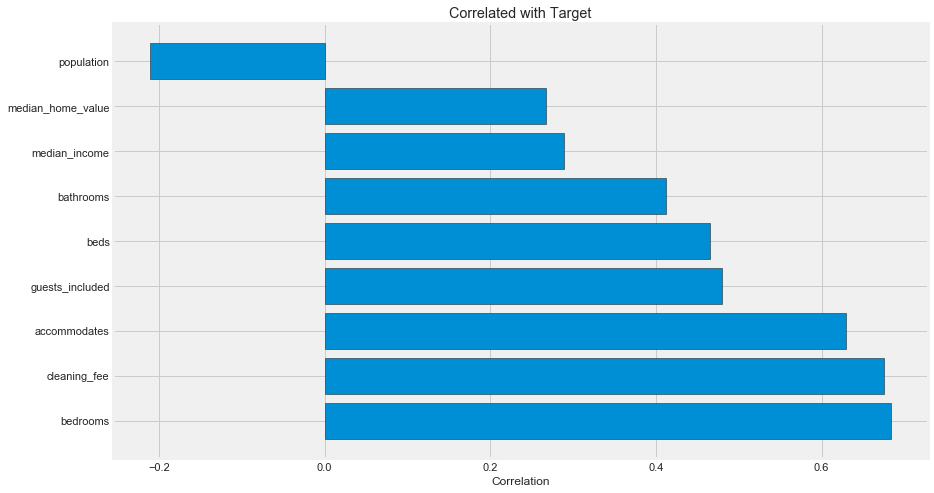

In [8]:
# Chart out top correlated features
plt.figure(figsize = (13, 8))
ax = plt.subplot()

# Need to reverse the index to plot most important on top
ax.barh(cm.index[1:],cm['price'][1:], edgecolor = 'k')
plt.xlabel('Correlation'); plt.title('Correlated with Target')

## Absolute Correlated Features

In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(num_df, 15))

Top Absolute Correlations
distance_Seaworld            distance_San_Diego             0.999940
distance_Convention_Center   distance_Downtown_LA           0.994344
longitude                    distance_Ontario_airport       0.984386
distance_Universal           distance_Hollywood             0.982274
distance_Santa_Monica_beach  distance_Venice_beach          0.982107
distance_Griffith_Park       distance_Hollywood             0.970543
availability_60              availability_90                0.963868
distance_LAX                 distance_Venice_beach          0.958866
distance_Universal           distance_Griffith_Park         0.957898
distance_Disneyland          distance_San_Diego             0.940795
                             distance_Seaworld              0.938767
availability_30              availability_60                0.912963
distance_Downtown_LA         distance_Griffith_Park         0.909760
distance_Convention_Center   distance_Griffith_Park         0.903356
distance

**I will remove availability_60, availability_90, and Mean(income) in pre-processing due to the high correlation**

# Distribution Analysis

## Target Distribution

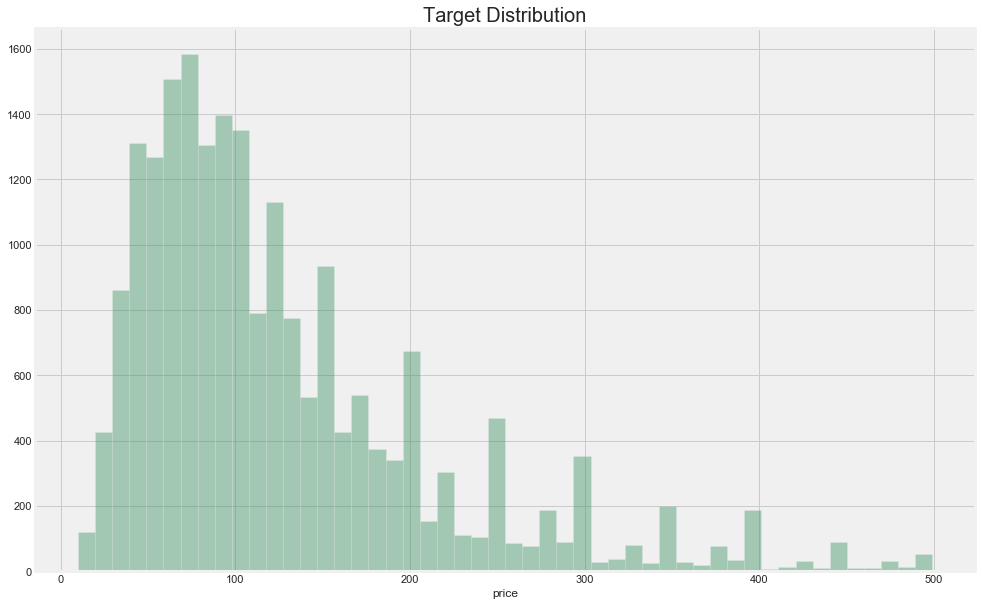

In [10]:
if len(y.unique()) == 2:
    f, axes = plt.subplots(figsize=(10, 5))
    sns.countplot(y, palette="BuGn_r").set_title('Target Distribution', fontsize=20)
else:
    f, axes = plt.subplots(figsize=(15, 10))
    sns.distplot(y,kde=False,color='seagreen').set_title('Target Distribution', fontsize=20)

 ## Empirical Cumulative Distribution Function (ECDF)

### Background

In statistics, an empirical distribution function is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

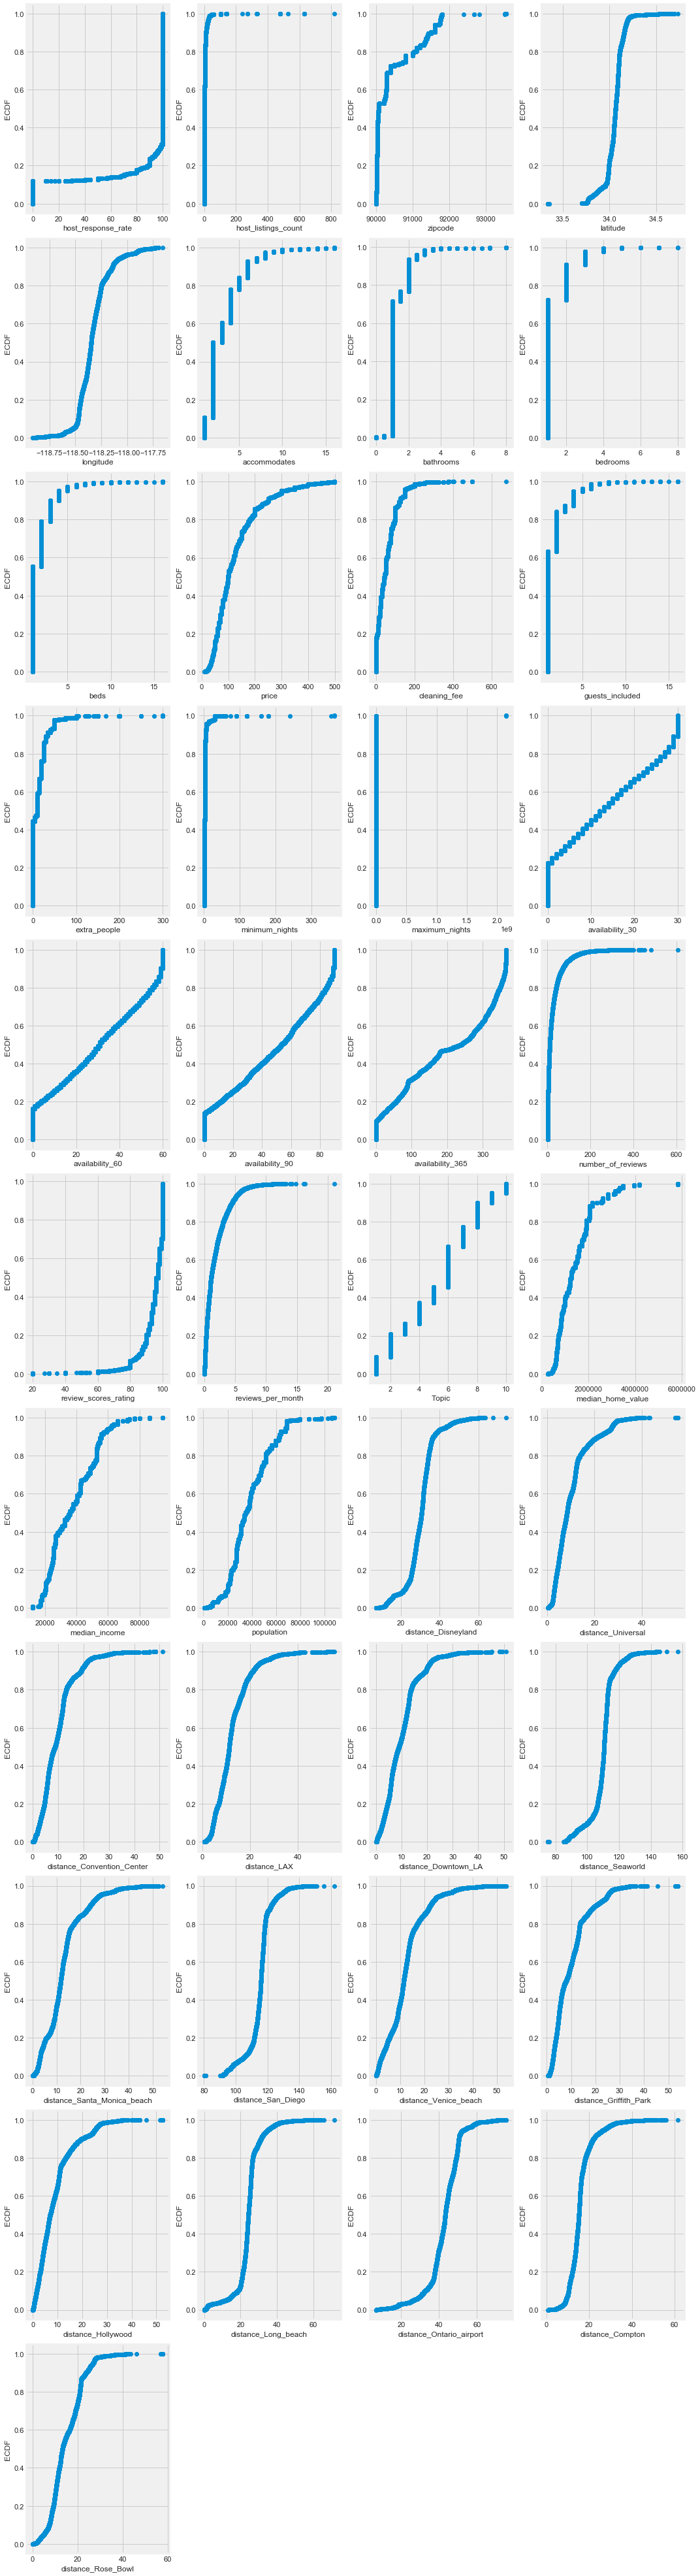

In [11]:
l = num_df.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(15,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    ecdf(num_df[l[i]],x_label=l[i])
    plt.tight_layout()

## Boxplots

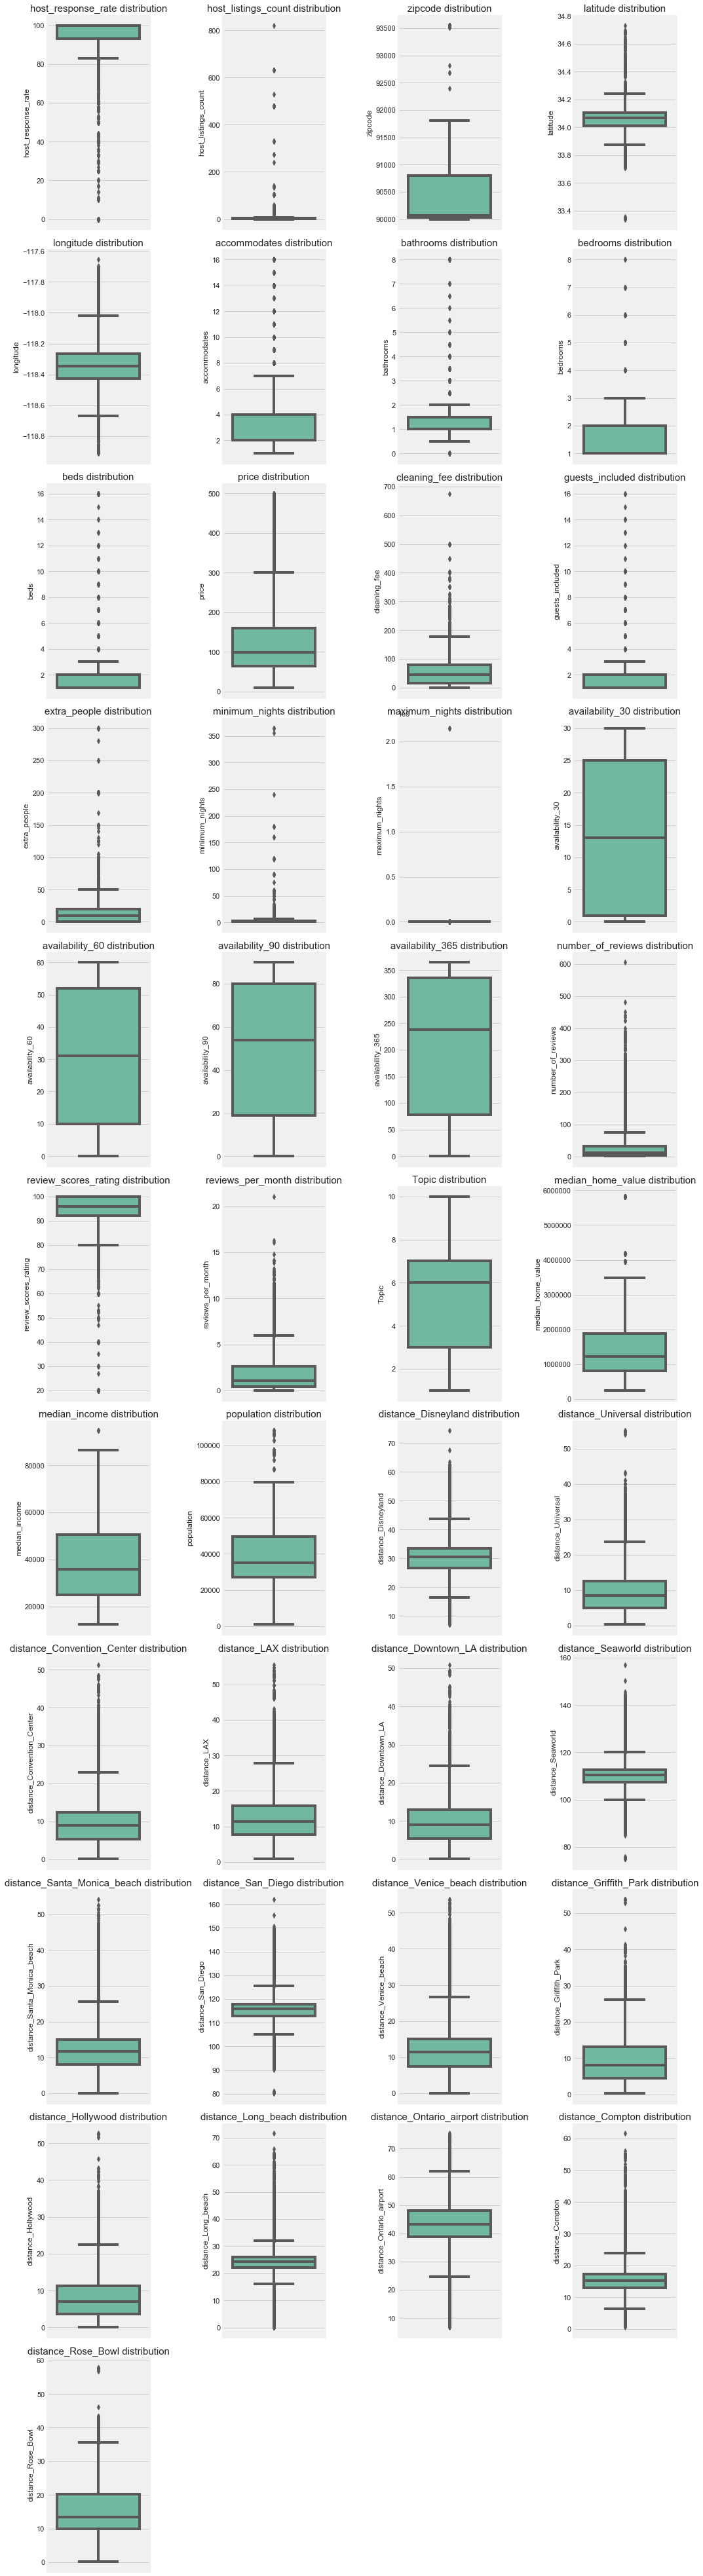

In [12]:
l = num_df.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(15,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.boxplot(num_df[l[i]].dropna(),orient='v', palette="BuGn_r").set_title(f'{l[i]} distribution', fontsize=15)
    plt.tight_layout()

## Target Distribution by Selected Categories

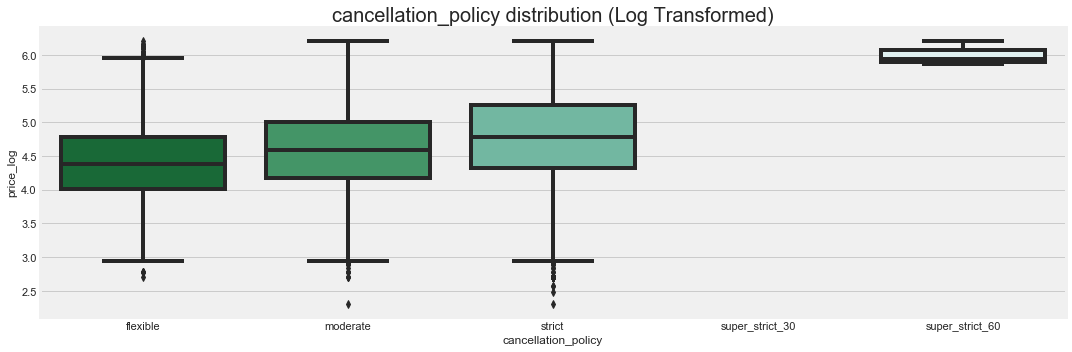

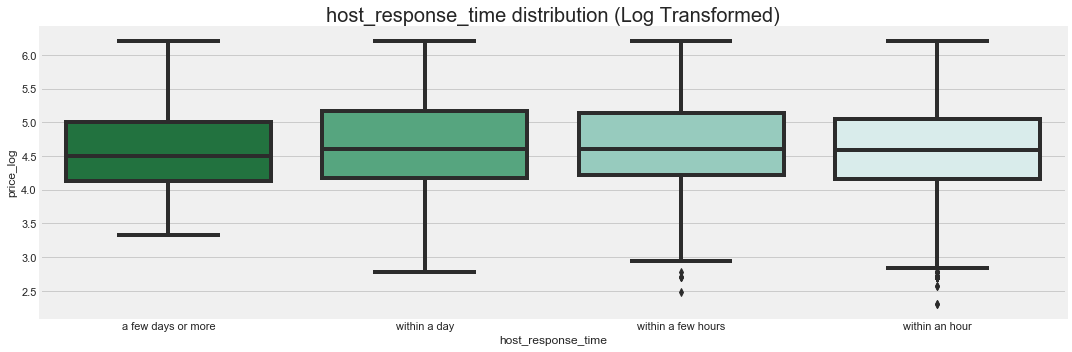

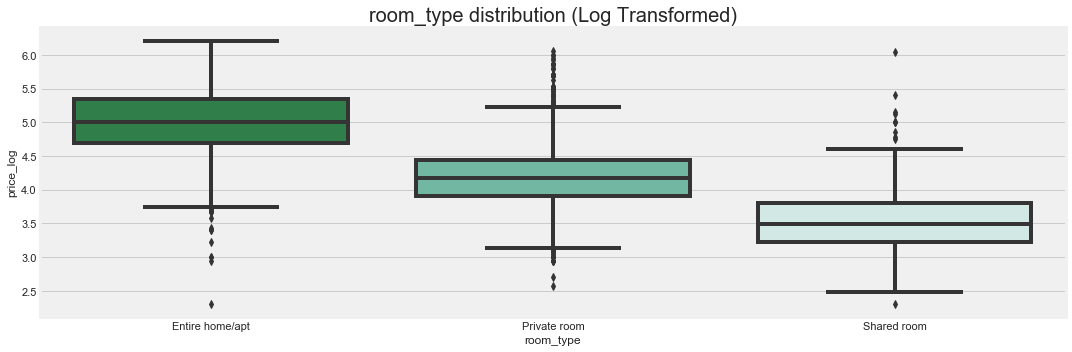

In [13]:
import math

df['price_log'] = df['price'].apply(lambda x: math.log(x))

col = ['cancellation_policy', 'host_response_time', 'room_type']
for c in col:
    f, axes = plt.subplots(figsize=(15, 5))
    sns.boxplot(x=df[c], y=df['price_log'], orient='v',
                palette="BuGn_r").set_title(
                    f"{c} distribution (Log Transformed)", fontsize=20)
    plt.tight_layout()

# Mapping

In [14]:
from PIL import Image, ImageDraw, ImageFont
import folium
from folium import plugins
from folium.plugins import HeatMap
import os
import io
os.environ["PATH"] += os.pathsep + "."

In [15]:
def capture_frame(save_path, my_frame):

    # generate the png file as a byte array
    png = my_frame._to_png()

    # create a PIL image object
    image = Image.open(io.BytesIO(png))
    draw = ImageDraw.ImageDraw(image)

    # write to a png file
    filename = os.path.join(save_path, "heatmap.png")
    image.save(filename, "PNG")
    return image

In [16]:
def heat_map(df,lat,lon,center,zoom=9):
    """
    Mapbox Bright
    CartoDB dark_matter
    Mapbox Control Room
    Stamen Toner
    OpenStreetMap
    Stamen Terrain
    mapquestopen
    cartodbdark_matter
    """
    
    folium_map = folium.Map(location=center,
                            zoom_start=zoom,
                            zoomControl= False,
                            attributionControl=False,
                            tiles="Stamen Terrain")

    HeatMap(df[[lat, lon]],
            radius=11,
            min_opacity=0.6,
            max_opacity=0.8,
            use_local_extrema=True).add_to(folium_map)
    return folium_map

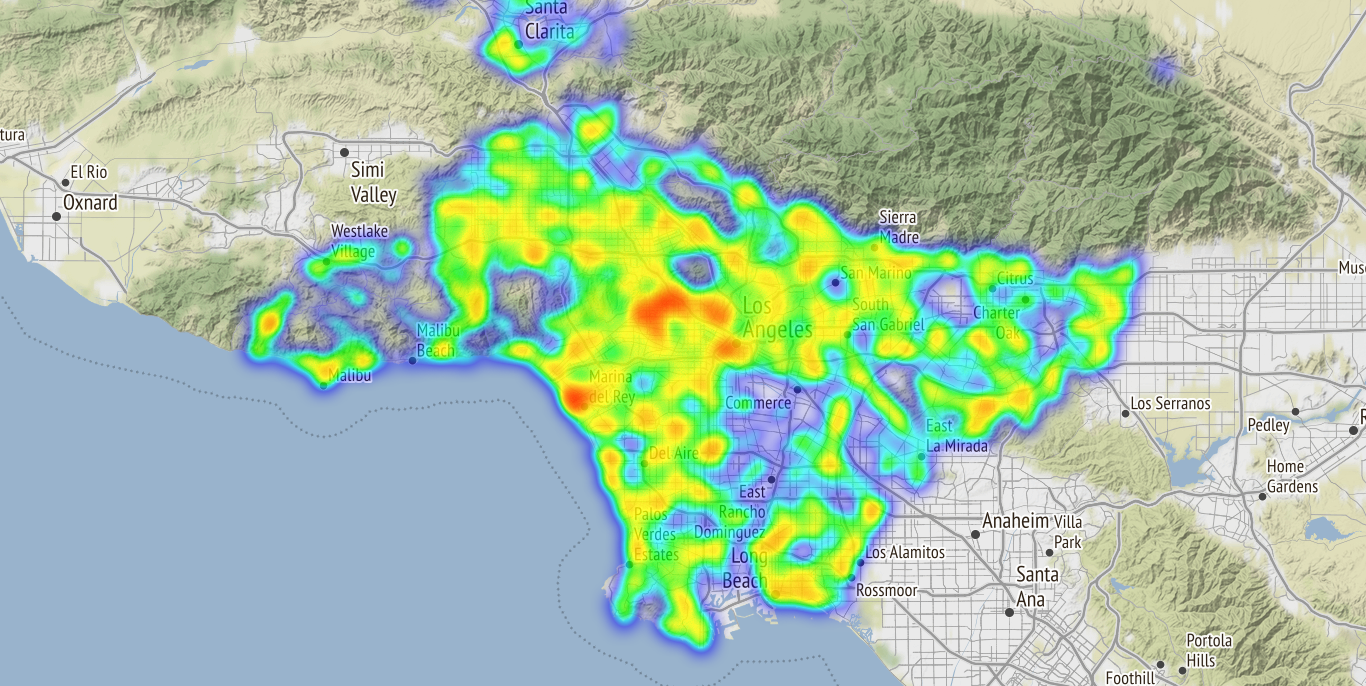

In [17]:
center = [34.05371495883771, -118.31562523116035]

map_frame = heat_map(df,
             'latitude',
             'longitude',
             center,
             zoom=10)
capture_frame("img/", map_frame)